# EDA Layer

## **Description:**

- Now we are going to attend a new DS step - **Exploratory Data Analysis**. We want to produce ML model for a business problem but are still unfamiliar with the underlying processes. Now, we have an opportunity to tackle this problem, 
- You need to explore your data to answer the following questions:
    - What I'm working with ?
    - What are the main patterns and tendencies with my data ?
    - How do my data entities interact ?
    - What should I do with my data to obtain good features ?
    - What are the problems with the probable prediction ?
    - How could I manually make predict based on data ? 


## **Possible Tools:**

- Data visualisation - seaborn, plotly, matplotlib
- Data processing - pandas, numpy, statsmodels, scikit-learn 
- Whatever you might find useful

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
import scripts.eda as eda # etl.py module

In [2]:
train_df = pd.read_csv('../data/merged_train.csv')

train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.00,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,899.00,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,1709.05,1,0,0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1,0,0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        int64  
 6   month               int64  
 7   year                int64  
 8   item_name           object 
 9   item_category_id    int64  
 10  item_category_name  object 
 11  shop_name           object 
dtypes: float64(1), int64(7), object(4)
memory usage: 268.8+ MB


In [4]:
train_df['date'] = pd.to_datetime(train_df['date'])

int_columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_day', 'month', 'year', 'item_category_id']
float_columns = ['item_price']
object_columns = ['item_name', 'item_category_name', 'shop_name']

train_df = eda.transform_df_types(train_df, int_columns, float_columns, object_columns)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int32         
 2   shop_id             int32         
 3   item_id             int32         
 4   item_price          float32       
 5   item_cnt_day        int32         
 6   month               int32         
 7   year                int32         
 8   item_name           category      
 9   item_category_id    int32         
 10  item_category_name  category      
 11  shop_name           category      
dtypes: category(3), datetime64[ns](1), float32(1), int32(7)
memory usage: 123.9 MB


## We can analyze data sequentially column by column. Let's start with **date**

## **date** feature

In [5]:
train_df['date_month'] = train_df['date'].dt.month
train_df['date_year'] = train_df['date'].dt.year
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year
0,2013-01-02,0,59,22154,999.000000,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2013
1,2013-01-03,0,25,2552,899.000000,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
2,2013-01-05,0,25,2552,899.000000,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
3,2013-01-06,0,25,2554,1709.050049,1,0,0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
4,2013-01-15,0,25,2555,1099.000000,1,0,0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1,2013


<Axes: xlabel='date_month', ylabel='item_cnt_day'>

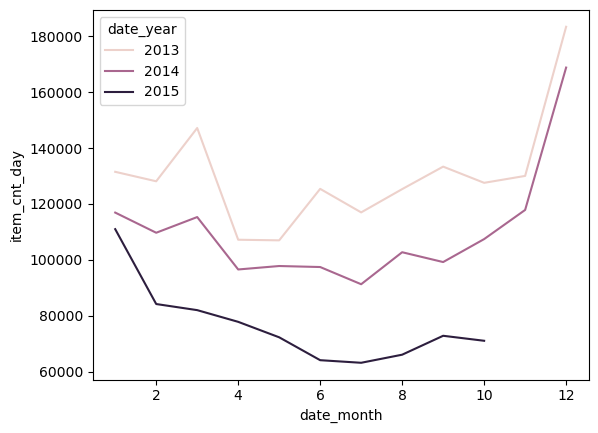

In [6]:
train_year_month = train_df.groupby(['date_year', 'date_month']).agg({'item_cnt_day': 'sum'}).reset_index()

sns.lineplot(x='date_month', y='item_cnt_day', hue='date_year', data=train_year_month)

Text(0, 0.5, 'Sales Amount')

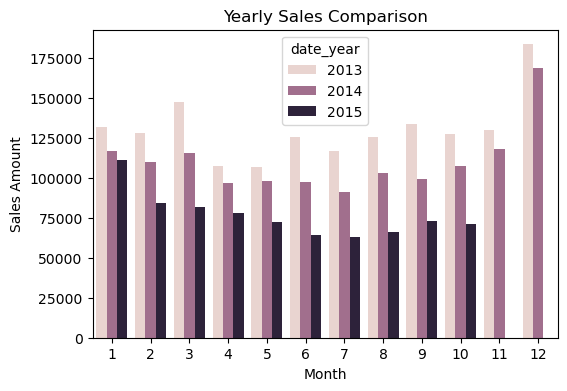

In [7]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='date_month', y='item_cnt_day', hue='date_year', data=train_year_month)
plt.title("Yearly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales Amount")

In [8]:
# the number of shop visits per year
train_df.groupby(['date_year'])['date'].count()

date_year
2013    1267561
2014    1055861
2015     612426
Name: date, dtype: int64

In [9]:
# average number of items sold during one visit per year
train_df.groupby(['date_year'])['item_cnt_day'].sum() / train_df.groupby(['date_year'])['date'].count()

date_year
2013    1.232865
2014    1.251007
2015    1.248451
dtype: float64

Now we can notice, that as the year number increases, the whole number of items sold per month decreases (while the trend lines look very similar).
From one point of view, this may be the result of the number of purchase observations decreasing by 16.7% in 2014 comparing to 2013. I believe, it doesn't
refer to data collecting issues and all the data is complete. WHat's more, the average number of items sold during one visit per year increased a little, so this may be just a small change in behavior of customers :)

### And in general, **month** and **year** are truly informative for future predictions because of the trend observed as well as the number of items sold reduction.

## **shop** features

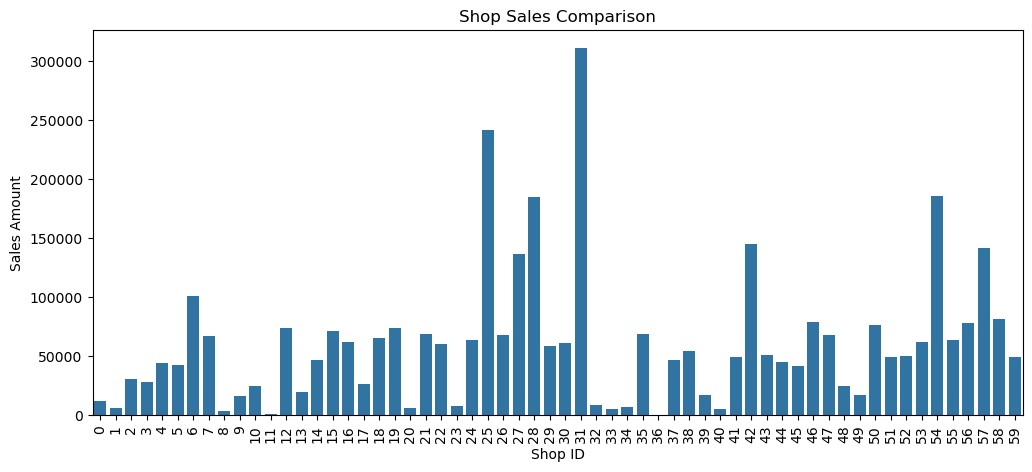

In [10]:
shop_id_aggregated = train_df.groupby(['shop_id'])['item_cnt_day'].sum()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=shop_id_aggregated.index, y=shop_id_aggregated.values)
plt.title("Shop Sales Comparison")
plt.xlabel("Shop ID")
plt.ylabel("Sales Amount")
plt.xticks(rotation=90);

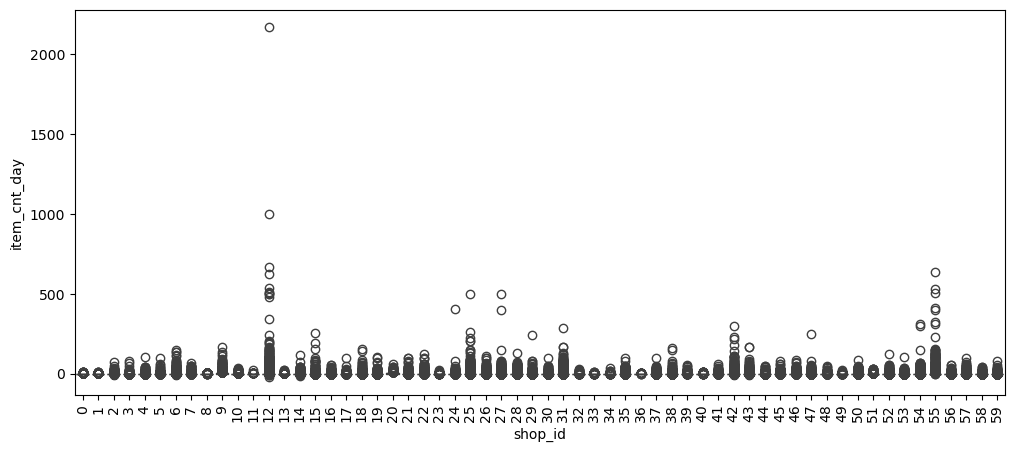

In [11]:
var = 'shop_id'
data = pd.concat([train_df['item_cnt_day'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 5))
fig = sns.boxplot(x=var, y="item_cnt_day", data=data)
plt.xticks(rotation=90);

There are ids having significantly more sales than others (like 25, 31, 54 and etc.) What's interesting, they are not in the top in terms of outliers

Let's see how do shop names look like

In [12]:
train_df['shop_name'].head(10)

0    Ярославль ТЦ "Альтаир"
1       Москва ТРК "Атриум"
2       Москва ТРК "Атриум"
3       Москва ТРК "Атриум"
4       Москва ТРК "Атриум"
5       Москва ТРК "Атриум"
6       Москва ТРК "Атриум"
7       Москва ТРК "Атриум"
8       Москва ТРК "Атриум"
9       Москва ТРК "Атриум"
Name: shop_name, dtype: category
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']

In [13]:
train_df['shop_city'] = train_df['shop_name'].apply(lambda x: x.split(' ')[0])
print('Number of unique shop cities:', len(train_df['shop_city'].unique()))
train_df['shop_city'].unique()

Number of unique shop cities: 32


array(['Ярославль', 'Москва', 'Курск', 'Красноярск', 'Волжский',
       'Воронеж', 'Адыгея', 'Балашиха', '!Якутск', 'Коломна', 'Калуга',
       'Жуковский', 'Казань', 'Интернет-магазин', 'Уфа', 'Н.Новгород',
       'Чехов', 'Химки', 'Сургут', 'Тюмень', 'СПб', 'РостовНаДону',
       'Омск', 'Самара', 'Новосибирск', 'Сергиев', 'Вологда', 'Якутск',
       'Цифровой', 'Выездная', 'Томск', 'Мытищи'], dtype=object)

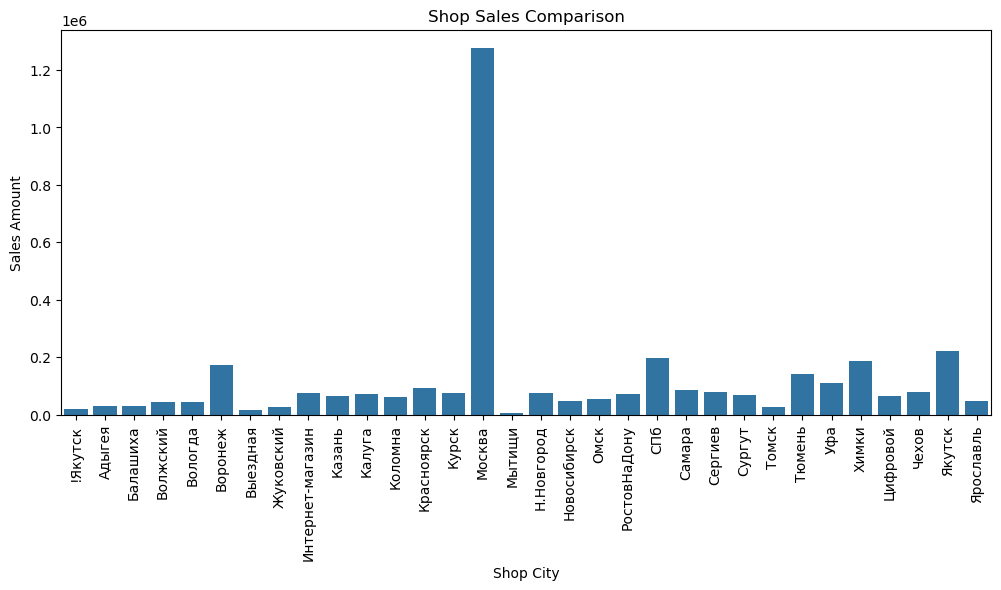

In [14]:
shop_city_aggregated = train_df.groupby(['shop_city'])['item_cnt_day'].sum()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=shop_city_aggregated.index, y=shop_city_aggregated.values)
plt.title("Shop Sales Comparison")
plt.xlabel("Shop City")
plt.ylabel("Sales Amount")
plt.xticks(rotation=90);

In [15]:
print(train_df[train_df['shop_city'] == '!Якутск']['shop_name'].unique())
print(train_df[train_df['shop_city'] == 'Якутск']['shop_name'].unique())

['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран']
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']
['Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"']
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']


'!Якутск' and 'Якутск' cities seam to have the same shops, so they should be united

In [16]:
print('Орджоникидзе')
print(train_df[train_df['shop_name'] == '!Якутск Орджоникидзе, 56 фран']['shop_id'].unique())
print(train_df[train_df['shop_name'] == 'Якутск Орджоникидзе, 56']['shop_id'].unique())
print('Центральный')
print(train_df[train_df['shop_name'] == '!Якутск ТЦ "Центральный" фран']['shop_id'].unique())
print(train_df[train_df['shop_name'] == 'Якутск ТЦ "Центральный"']['shop_id'].unique())

Орджоникидзе
[0]
[57]
Центральный
[1]
[58]


In [17]:
train_df[train_df['shop_city'] == 'Жуковский']['shop_name'].unique()

['Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²']
Categories (60, object): ['!Якутск Орджоникидзе, 56 фран', '!Якутск ТЦ "Центральный" фран', 'Адыгея ТЦ "Мега"', 'Балашиха ТРК "Октябрь-Киномир"', ..., 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', 'Ярославль ТЦ "Альтаир"']

In [18]:
print(train_df[train_df['shop_name'] == 'Жуковский ул. Чкалова 39м?']['shop_id'].unique())
print(train_df[train_df['shop_name'] == 'Жуковский ул. Чкалова 39м²']['shop_id'].unique())

[10]
[11]


The same issue for 'Жуковский ул. Чкалова 39м?' and 'Жуковский ул. Чкалова 39м²'

This should be also done for **test_df**

In [19]:
test_df = pd.read_csv('../data/merged_test.csv')

train_df = eda.change_shop_attributes(train_df)
test_df = eda.change_shop_attributes(test_df)

# transform shop_city as well
train_df['shop_city'] = train_df['shop_name'].apply(lambda x: x.split(' ')[0])
test_df['shop_city'] = test_df['shop_name'].apply(lambda x: x.split(' ')[0])

## **item** features

In [20]:
item_names = train_df['item_name'].unique().tolist()

item_names_strange = [item_name for item_name in item_names if not item_name[0].isalpha() and not item_name[0].isdigit()]

item_names_strange

['/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72',
 '*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь',
 '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '/ТЫ  - ТРУП',
 '/ОДНАЖДЫ В КИТАЕ-2',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '//НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион)',
 '*СПАСАЯ ЭМИЛИ                           D',
 '/ПОСЛЕДНИЙ ШАНС',
 '***КОРОБКА (СТЕКЛО)                       D',
 '! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '//МОНГОЛ С.Бодров (Регион)',
 '/УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)',
 '//АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)',
 '*ЛИНИЯ СМЕРТИ                           D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '*ЗА ГРАНЬЮ СМЕРТИ             

In [21]:
item_names_strange_D = [item_name for item_name in item_names if item_name.endswith('  D')]

item_names_strange_D

['***УДАР ПО ВОРОТАМ (UNI)               D',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '*СПАСАЯ ЭМИЛИ                           D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '*ЛИНИЯ СМЕРТИ                           D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '*ЗА ГРАНЬЮ СМЕРТИ                       D']

In [22]:
train_strange_names = train_df[train_df['item_name'].isin(item_names_strange_D)]

train_strange_names[['item_name', 'item_cnt_day', 'item_price']]

,item_name,item_cnt_day,item_price
1812427,***УДАР ПО ВОРОТАМ (UNI) D,1,100.0
1812447,***ГОЛУБАЯ ВОЛНА (Univ) D,1,100.0
1908985,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,1,58.0
1908986,***ЧАЙ С МУССОЛИНИ D,1,58.0
1909008,***ГОЛУБАЯ ВОЛНА (Univ) D,1,58.0
1909009,***В ЛУЧАХ СЛАВЫ (UNV) D,1,58.0
1946603,/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/ D,1,58.0
1972615,***ЧАЙ С МУССОЛИНИ D,1,58.0
1972616,*СПАСАЯ ЭМИЛИ D,1,58.0
1972623,***КОРОБКА (СТЕКЛО) D,1,58.0


(Un)fortunately I see nothing strange in items ending with "    D" or starting with "*" or "/"or "!". Especially when there is < 30 of them

## **category** features

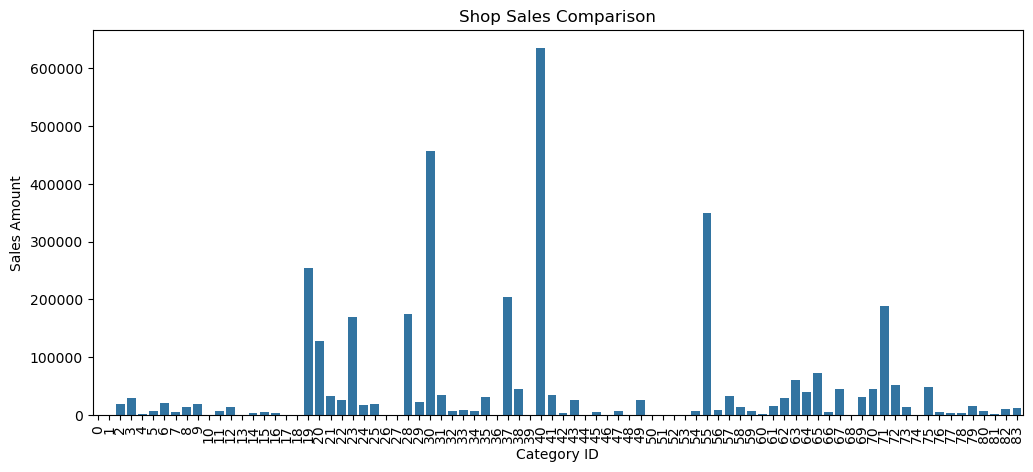

In [23]:
category_id_aggregated = train_df.groupby(['item_category_id'])['item_cnt_day'].sum()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=category_id_aggregated.index, y=category_id_aggregated.values)
plt.title("Shop Sales Comparison")
plt.xlabel("Category ID")
plt.ylabel("Sales Amount")
plt.xticks(rotation=90);

In [24]:
train_df['large_category_name'] = train_df['item_category_name'].apply(lambda x: x.split(' - ')[0])

train_df['large_category_name'].unique().tolist()

['Кино',
 'Музыка',
 'Игры',
 'Игры PC',
 'Программы',
 'Книги',
 'Подарки',
 'Аксессуары',
 'Игровые консоли',
 'Карты оплаты',
 'Чистые носители (штучные)',
 'Чистые носители (шпиль)',
 'Служебные',
 'PC',
 'Элементы питания',
 'Доставка товара',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Билеты (Цифра)',
 'Игры Android',
 'Игры MAC']

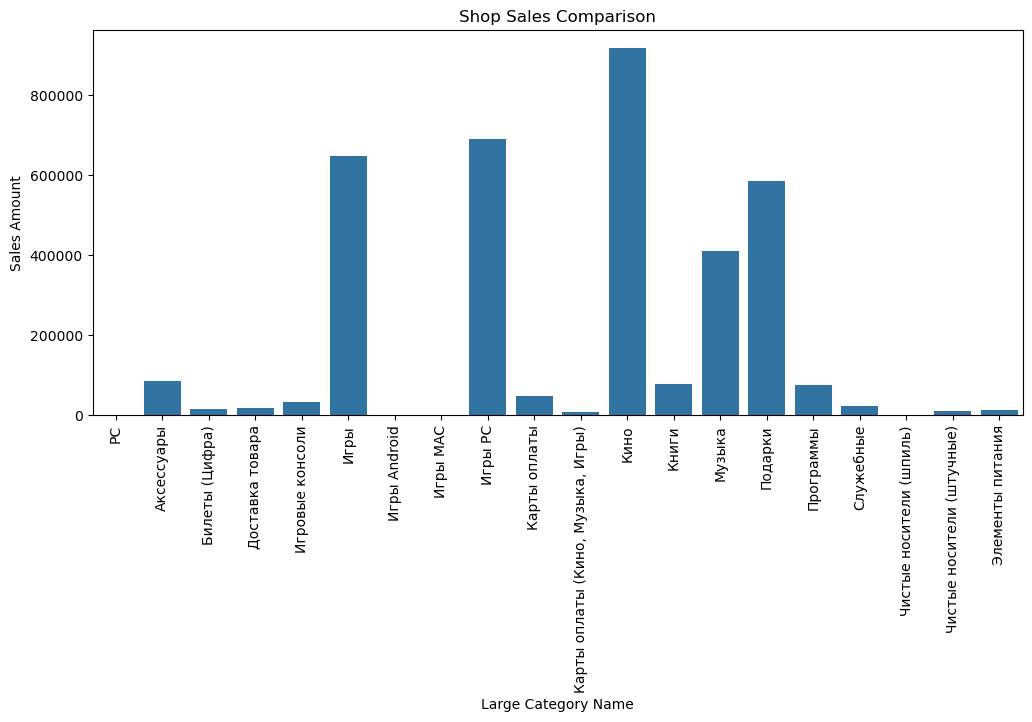

In [25]:
large_categories_aggregated = train_df.groupby(['large_category_name'])['item_cnt_day'].sum()

plt.figure(figsize=(12,5))
ax = sns.barplot(x=large_categories_aggregated.index, y=large_categories_aggregated.values)
plt.title("Shop Sales Comparison")
plt.xlabel("Large Category Name")
plt.ylabel("Sales Amount")
plt.xticks(rotation=90);

In [26]:
categories = train_df['item_category_name'].unique().tolist()
print([item_name for item_name in categories if 'PS3' in item_name])
print([item_name for item_name in categories if 'PS4' in item_name])

['Игры - PS3', 'Аксессуары - PS3', 'Игровые консоли - PS3']
['Аксессуары - PS4', 'Игровые консоли - PS4', 'Игры - PS4']


## Transform aggregated_train_df

In [27]:
aggregated_train_df = pd.read_csv('../data/merged_train_aggregated.csv')
aggregated_train_df = eda.change_shop_attributes(aggregated_train_df)

int_columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'month', 'year', 'item_category_id']
float_columns = ['item_price']
object_columns = ['item_name', 'item_category_name', 'shop_name']

aggregated_train_df = eda.transform_df_types(aggregated_train_df, int_columns, float_columns, object_columns)

aggregated_train_df['large_category_name'] = aggregated_train_df['item_category_name'].apply(lambda x: x.split(' - ')[0])
aggregated_train_df['shop_city'] = aggregated_train_df['shop_name'].apply(lambda x: x.split(' ')[0])
aggregated_train_df = eda.change_shop_attributes(aggregated_train_df)

## Add lag features

In [28]:
aggregated_lagged_train_df = eda.train_add_lag_features(aggregated_train_df)
aggregated_lagged_train_df.isna().sum()

/home/alexennk/Programs/INNOWISE/ml-ds-practice/notebooks/../scripts/eda.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1  1  1 ... 34 34 34]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_df.loc[:, 'date_block_num'] = new_df['date_block_num'] + lag


date_block_num          0
shop_id                 0
item_id                 0
item_cnt_month          0
item_price              0
month                   0
year                    0
item_name               0
item_category_id        0
item_category_name      0
shop_name               0
large_category_name     0
shop_city               0
item_cnt_month_lag_1    0
item_cnt_month_lag_2    0
item_cnt_month_lag_3    0
dtype: int64

In [29]:
test_df = eda.test_add_lag_features(df=test_df, original_df=aggregated_train_df)
test_df.isna().sum()

ID                      0
shop_id                 0
item_id                 0
item_name               0
item_category_id        0
item_category_name      0
shop_name               0
shop_city               0
item_cnt_month_lag_1    0
item_cnt_month_lag_2    0
item_cnt_month_lag_3    0
dtype: int64

In [30]:
aggregated_lagged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   date_block_num        1609124 non-null  int32   
 1   shop_id               1609124 non-null  int32   
 2   item_id               1609124 non-null  int32   
 3   item_cnt_month        1609124 non-null  int32   
 4   item_price            1609124 non-null  float32 
 5   month                 1609124 non-null  int32   
 6   year                  1609124 non-null  int32   
 7   item_name             1609124 non-null  category
 8   item_category_id      1609124 non-null  int32   
 9   item_category_name    1609124 non-null  category
 10  shop_name             1609124 non-null  category
 11  large_category_name   1609124 non-null  object  
 12  shop_city             1609124 non-null  object  
 13  item_cnt_month_lag_1  1609124 non-null  float64 
 14  item_cnt_month_lag

## Count average shop-item price

In [31]:
train_avg_price = train_df.groupby(['shop_id', 'item_id']).agg({'item_price': 'mean'}).reset_index()

aggregated_lagged_train_df.drop('item_price', axis=1, inplace=True)

aggregated_lagged_train_df = aggregated_lagged_train_df.merge(train_avg_price, on=['shop_id', 'item_id'], how='left')
test_df = test_df.merge(train_avg_price, on=['shop_id', 'item_id'], how='left')

## Create new features from shop_id, category_id

### category_id

In [32]:
aggregated_lagged_train_df = eda.threshold_sales(train_df, aggregated_lagged_train_df, 'item_category_id')

### shop_id

In [33]:
aggregated_lagged_train_df = eda.threshold_sales(train_df, aggregated_lagged_train_df, 'shop_id')

### shop_city

In [34]:
aggregated_lagged_train_df = eda.threshold_sales(train_df, aggregated_lagged_train_df, 'shop_city')

### large_category

In [35]:
aggregated_lagged_train_df = eda.threshold_sales(train_df, aggregated_lagged_train_df, 'large_category_name')

In [36]:
aggregated_lagged_train_df.head()

,date_block_num,shop_id,item_id,item_cnt_month,month,year,item_name,item_category_id,item_category_name,shop_name,large_category_name,shop_city,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price,item_category_id_sales_level,shop_id_sales_level,shop_city_sales_level,large_category_name_sales_level
0,0,57,32,6,0,0,1+1,40,Кино - DVD,"Якутск Орджоникидзе, 56",Кино,Якутск,0.0,0.0,0.0,242.728394,2,2,2,2
1,0,57,33,3,0,0,1+1 (BD),37,Кино - Blu-Ray,"Якутск Орджоникидзе, 56",Кино,Якутск,0.0,0.0,0.0,228.699997,2,2,2,2
2,0,57,35,1,0,0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"Якутск Орджоникидзе, 56",Кино,Якутск,0.0,0.0,0.0,285.000000,2,2,2,2
3,0,57,43,1,0,0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"Якутск Орджоникидзе, 56",Кино,Якутск,0.0,0.0,0.0,189.000000,2,2,2,2
4,0,57,51,2,0,0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"Якутск Орджоникидзе, 56",Музыка,Якутск,0.0,0.0,0.0,261.600006,2,2,2,2


## Check correlation with heatmap

<Axes: >

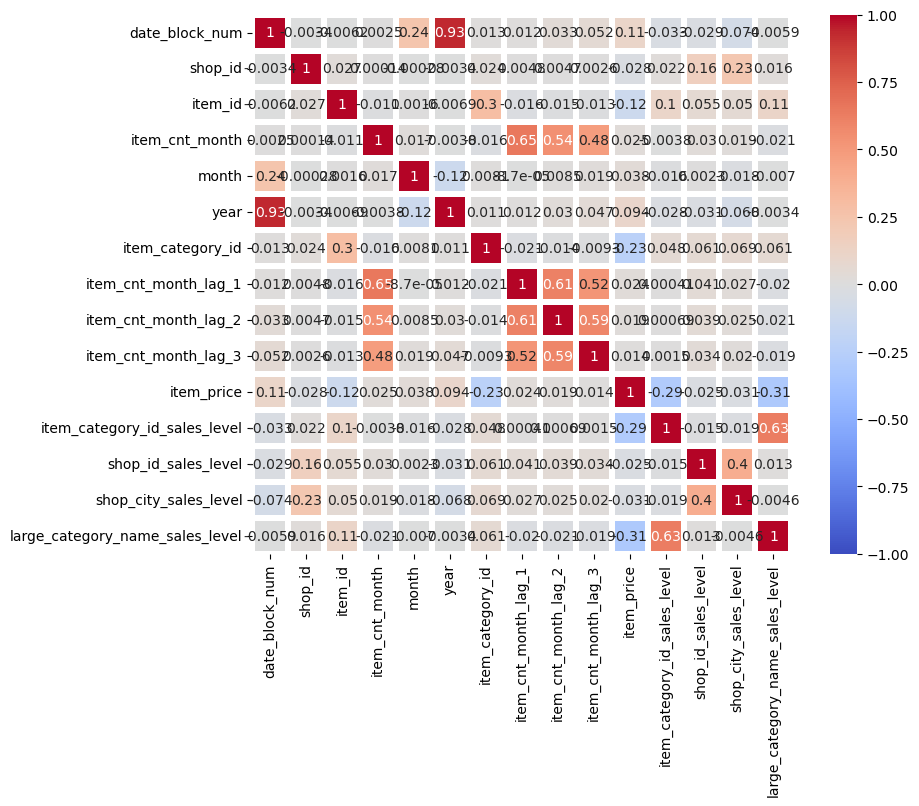

In [37]:
numeric_train_df = aggregated_lagged_train_df.select_dtypes(include=np.number)
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(numeric_train_df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=3, square=True)

## Export resulting dataframes

In [38]:
test_df.head()

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,shop_city,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Вологда,0.0,1.0,3.0,1633.692261
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",Вологда,0.0,0.0,0.0,NaN
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Вологда,1.0,3.0,1.0,865.666687
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",Вологда,0.0,0.0,1.0,599.000000
4,4,5,5268,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",Вологда,0.0,0.0,0.0,NaN


In [39]:
train_df = pd.read_csv('../data/merged_train.csv')

In [40]:
test_set = set(test_df['item_id'].unique().tolist())
train_set = set(train_df['item_id'].unique().tolist())

print(test_set - train_set)

{20486, 6152, 6153, 6169, 14383, 20535, 4156, 10310, 20560, 20561, 83, 20577, 16498, 6259, 20594, 20599, 20600, 12409, 18560, 10372, 140, 8337, 12441, 8354, 8355, 168, 173, 12468, 12469, 12470, 12471, 14521, 6335, 18627, 20677, 20680, 204, 4310, 16601, 4318, 237, 10483, 249, 254, 10507, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 12568, 20760, 12574, 16675, 6439, 302, 12591, 14647, 14648, 4412, 20796, 14662, 8545, 20836, 8549, 20837, 8551, 20843, 20845, 2420, 6519, 6520, 6521, 2426, 2427, 2428, 6522, 6523, 6524, 6525, 6526, 2434, 6527, 6528, 6529, 6530, 6531, 6532, 6533, 20878, 20879, 20880, 402, 14739, 14760, 16811, 428, 14765, 430, 16813, 14784, 454, 480, 18913, 8676, 14832, 6645, 10747, 12802, 20996, 20863, 2569, 8722, 10779, 4642, 18979, 566, 8760, 6729, 6730, 6731, 6732, 6733, 6734, 16976, 6742, 6743, 12890, 19048, 14959, 8821, 8822, 8823, 8824, 8825, 8826, 12920, 14972, 639, 640, 17030, 19085, 8850, 12961, 2722, 15033, 8890, 15034, 21196, 6863, 19155, 17117, 21214, 6891, 6903, 1304

## Split into train and test

In [41]:
train = aggregated_lagged_train_df.select_dtypes(include=np.number)
train.head()

,date_block_num,shop_id,item_id,item_cnt_month,month,year,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price,item_category_id_sales_level,shop_id_sales_level,shop_city_sales_level,large_category_name_sales_level
0,0,57,32,6,0,0,40,0.0,0.0,0.0,242.728394,2,2,2,2
1,0,57,33,3,0,0,37,0.0,0.0,0.0,228.699997,2,2,2,2
2,0,57,35,1,0,0,40,0.0,0.0,0.0,285.000000,2,2,2,2
3,0,57,43,1,0,0,40,0.0,0.0,0.0,189.000000,2,2,2,2
4,0,57,51,2,0,0,57,0.0,0.0,0.0,261.600006,2,2,2,2


In [42]:
# features = train.columns.tolist()
# features.remove('date_block_num')
# features.remove('item_cnt_month')
features = ['shop_id', 'item_id', 'month', 'year', 'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_price', 'item_category_id_sales_level', 'shop_id_sales_level', 'shop_city_sales_level', 'large_category_name_sales_level']
# features = ['shop_id', 'item_id', 'month', 'year', 'item_cnt_month', 'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_price']

X_train = train[train['date_block_num'] < 30][features]
y_train = train[train['date_block_num'] < 30]['item_cnt_month']
X_test = train[train['date_block_num'] == 30][features]
y_test = train[train['date_block_num'] == 30]['item_cnt_month']

### Perform scaling

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define a model

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()

lin_regr.fit(X_train, y_train)

LinearRegression()

In [45]:
lin_regr.coef_

array([-2.48426211e-02,  1.44349088e-02,  6.97292045e-02, -1.94905722e-01,
        4.11822505e+00,  1.58762790e+00,  1.06342462e+00,  9.17434147e-02,
       -1.14504345e-03,  5.58146409e-03, -4.54371847e-03,  1.30775988e-02])

In [46]:
train.head()

,date_block_num,shop_id,item_id,item_cnt_month,month,year,item_category_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_price,item_category_id_sales_level,shop_id_sales_level,shop_city_sales_level,large_category_name_sales_level
0,0,57,32,6,0,0,40,0.0,0.0,0.0,242.728394,2,2,2,2
1,0,57,33,3,0,0,37,0.0,0.0,0.0,228.699997,2,2,2,2
2,0,57,35,1,0,0,40,0.0,0.0,0.0,285.000000,2,2,2,2
3,0,57,43,1,0,0,40,0.0,0.0,0.0,189.000000,2,2,2,2
4,0,57,51,2,0,0,57,0.0,0.0,0.0,261.600006,2,2,2,2


In [47]:
y_pred = lin_regr.predict(X_test)
print("RMSE value:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE value: 2.7632889208657696


In [48]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=50, random_state=0)
# model.fit(X_train, y_train)

In [49]:
# y_rf_pred = model.predict(X_test)
# print("RMSE value:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))

In [50]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(n_estimators=2000, max_depth=7, learning_rate=0.07)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
y_xgboost_pred = xgboost.predict(X_test)
print("RMSE value:", np.sqrt(mean_squared_error(y_test, y_xgboost_pred)))

RMSE value: 2.789305393007757
